This Notebook Post Process Wave Height Output of One-dimensional FUNWAVE Simulations. 
-----

It consists of the following steps:

* **Step #1** - In this step you must specify your Project's title and the time parameters you used in your simulation. 


In [21]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from traitlets import link
from IPython.display import display, clear_output, HTML
import os
import io
import base64

space_box1 = widgets.Box(layout=widgets.Layout(width='50%',height = '50px')) # box created to have space among widgets

# Project title widget container (project label, project textbox, space between project widgets & project button)
label_title = widgets.HTML('Project Title:')
title_text = widgets.Text(layout=widgets.Layout(width = "40%"))
container_title = widgets.HBox(children=[label_title,title_text])

TIME_LABEL = widgets.HTML("""Specify the simulation's Time parameters:""")
# Total project time widget container (label & textbox)
label_time = widgets.Label('Total Time (sec):')
time_text = widgets.BoundedFloatText(max=43200, layout = widgets.Layout(width = "40%")) # total time max = 12hr
container_total_time = widgets.VBox(children=[label_time,time_text],
                              layout = widgets.Layout(width = "25%")) 

# Total project time widget container (label & textbox)
label_plotInt = widgets.Label('Plot Interval (sec):')
plotInt_text = widgets.BoundedFloatText(max=3600, layout=time_text.layout) # plot time max = 1 hr
container_pltint = widgets.VBox(children=[label_plotInt,plotInt_text],
                                layout = widgets.Layout(width = "25%")) 

# Steady time widget container (label & bounded float text)
label_steady_time = widgets.Label('Starting Time (STEADY_TIME):',layout = widgets.Layout(width = "90%"))
steady_time = widgets.BoundedFloatText(value = 1,layout = time_text.layout)
container_steadyTime = widgets.VBox(children=[label_steady_time,steady_time],
                                   layout = widgets.Layout(width = "25%")) 

#link((time_text,'value'), (steady_time, 'max'))

# T_INTV_mean widget container (label & bounded float text)
label_TIntvMean = widgets.Label('Time Interval (T_INTV_mean):',layout = label_steady_time.layout)
T_INTV_MEAN = widgets.BoundedFloatText(value = 1,layout = time_text.layout)
container_TIntvMean = widgets.VBox(children=[label_TIntvMean,T_INTV_MEAN],
                                  layout = widgets.Layout(width = "25%"))

TIME_CONTAINER = widgets.HBox(children=[container_total_time,container_pltint,container_steadyTime,container_TIntvMean])
                              
display(space_box1,container_title,space_box1,TIME_LABEL,TIME_CONTAINER,space_box1)

Box(layout=Layout(height='50px', width='50%'))

HBox(children=(HTML(value='Project Title:'), Text(value='', layout=Layout(width='40%'))))

Box(layout=Layout(height='50px', width='50%'))

HTML(value="Specify the simulation's Time parameters:")

HBox(children=(VBox(children=(Label(value='Total Time (sec):'), BoundedFloatText(value=0.0, layout=Layout(width='40%'), max=43200.0)), layout=Layout(width='25%')), VBox(children=(Label(value='Plot Interval (sec):'), BoundedFloatText(value=0.0, layout=Layout(width='40%'), max=3600.0)), layout=Layout(width='25%')), VBox(children=(Label(value='Starting Time (STEADY_TIME):', layout=Layout(width='90%')), BoundedFloatText(value=1.0, layout=Layout(width='40%'))), layout=Layout(width='25%')), VBox(children=(Label(value='Time Interval (T_INTV_mean):', layout=Layout(width='90%')), BoundedFloatText(value=1.0, layout=Layout(width='40%'))), layout=Layout(width='25%'))))

Box(layout=Layout(height='50px', width='50%'))

<hr style="height:2.5px;border:none;color:#333;background-color:#333;" /><br />

* **Step #2** - In this step you have the option of specifying the Wave Height type you want to post-process and if you want to generate images and/or videos. 

VBox(children=(VBox(children=(HTML(value='Specify the type of Output you want to post-process:', layout=Layout(height='25px')), Dropdown(index=2, options=('Specify Output', 'Average Wave Height (Havg)', 'Significant Wave Height (Hsig)', 'Root Mean Square Wave Height (Hrms)'), value='Significant Wave Height (Hsig)')), layout=Layout(height='70px')), Box(layout=Layout(height='50px', width='50%')), HBox(children=(VBox(children=(HTML(value='Press Button to Generate Hsig Image at a Specific Time:', layout=Layout(height='50px')), HBox(children=(HTML(value='Plot Hsig at time:', layout=Layout(width='39%')), BoundedIntText(value=150, layout=Layout(width='50%'), max=300, min=150, step=50)), layout=Layout(height='45px')), Box(layout=Layout(height='50px', width='50%')), Button(description='Generate Plot', layout=Layout(height='45px', width='90%'), style=ButtonStyle()), Box(layout=Layout(height='50px', width='50%')), Button(description='Save Plot', layout=Layout(height='45px', width='90%'), style=ButtonStyle())), layout=Layout(width='50%')), VBox(children=(HTML(value='Press Button to Generate Hsig Video:', layout=Layout(height='50px')), HBox(children=(Label(value='Lenght of Video in seconds:', layout=Layout(width='40%')), BoundedIntText(value=200, layout=Layout(width='50%'), max=300, min=200, step=50)), layout=Layout(height='45px')), Box(layout=Layout(height='50px', width='50%')), Button(description='Generate Model Video', layout=Layout(height='45px', width='90%'), style=ButtonStyle()), Box(layout=Layout(height='50px', width='50%')), VBox(children=(Label(value='Video Progress:', layout=Layout(width='30%')), FloatProgress(value=2.0, description='2/2', layout=Layout(height='45px', width='90%'), max=2.0)))), layout=Layout(width='50%'))), layout=Layout(display='')), HBox(children=(VBox(children=(HTML(value='Press Button to Generate Hsig Image at a Specific Time:', layout=Layout(height='50px')), HBox(children=(HTML(value='Plot Hsig at time:', layout=Layout(width='39%')), BoundedIntText(value=150, layout=Layout(width='50%'), max=300, min=150, step=50)), layout=Layout(height='45px')), Box(layout=Layout(height='50px', width='50%')), Button(description='Generate Plot', layout=Layout(height='45px', width='90%'), style=ButtonStyle()), Box(layout=Layout(height='50px', width='50%')), Button(description='Save Plot', layout=Layout(height='45px', width='90%'), style=ButtonStyle())), layout=Layout(width='50%')), VBox(children=(HTML(value='Press Button to Generate Hsig Video:', layout=Layout(height='50px')), HBox(children=(Label(value='Lenght of Video in seconds:', layout=Layout(width='40%')), BoundedIntText(value=200, layout=Layout(width='50%'), max=300, min=200, step=50)), layout=Layout(height='45px')), Box(layout=Layout(height='50px', width='50%')), Button(description='Generate Model Video', layout=Layout(height='45px', width='90%'), style=ButtonStyle()), Box(layout=Layout(height='50px', width='50%')), VBox(children=(Label(value='Video Progress:', layout=Layout(width='30%')), FloatProgress(value=2.0, description='2/2', layout=Layout(height='45px', width='90%'), max=2.0)))), layout=Layout(width='50%'))), layout=Layout(display='none')), HBox(children=(VBox(children=(HTML(value='Press Button to Generate Hsig Image at a Specific Time:', layout=Layout(height='50px')), HBox(children=(HTML(value='Plot Hsig at time:', layout=Layout(width='39%')), BoundedIntText(value=150, layout=Layout(width='50%'), max=300, min=150, step=50)), layout=Layout(height='45px')), Box(layout=Layout(height='50px', width='50%')), Button(description='Generate Plot', layout=Layout(height='45px', width='90%'), style=ButtonStyle()), Box(layout=Layout(height='50px', width='50%')), Button(description='Save Plot', layout=Layout(height='45px', width='90%'), style=ButtonStyle())), layout=Layout(width='50%')), VBox(children=(HTML(value='Press Button to Generate Hsig Video:', layout=Layout(height='50px')), HBox(children=(Label(value='Lenght of Video in seconds:', layout=Layout(width='40%')), Bounde

/Users/rdchlgs8/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:492: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


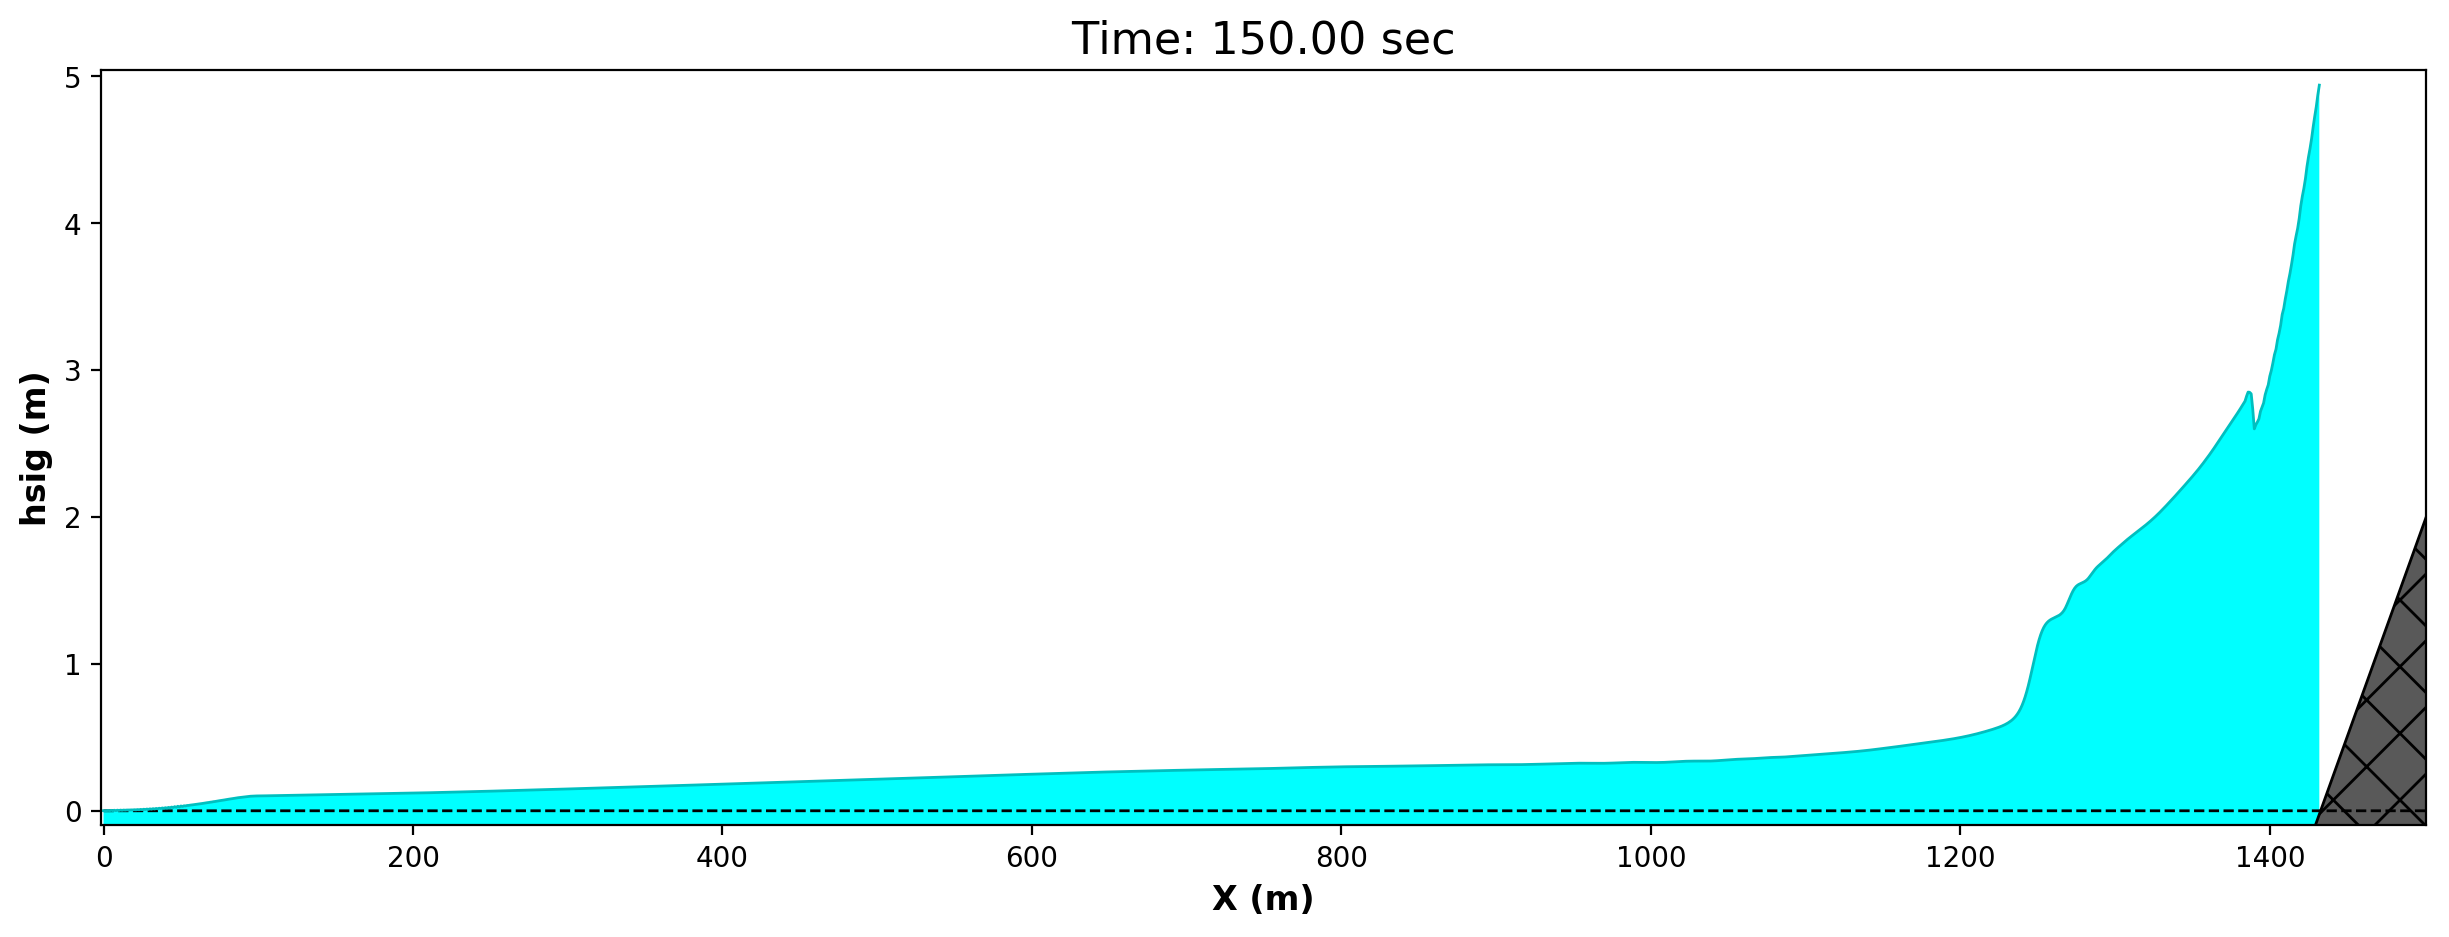

In [22]:
# output options dropdown widget
label_intro = widgets.HTML("""Specify the type of Output you want to post-process:""",
                           layout = widgets.Layout(height = '25px'))
out_options = ['Specify Output','Average Wave Height (Havg)','Significant Wave Height (Hsig)',
               'Root Mean Square Wave Height (Hrms)']  
out_list = widgets.Dropdown(options = out_options)
out_list_container = widgets.VBox([label_intro,out_list],layout = widgets.Layout(height = '70px'))


### Surface Option ###
# generate surface plot column (column 1)
PLOT_label = widgets.HTML('Press Button to Generate Surface Image at a Specific Time:',     
                            layout = widgets.Layout(height = '50px'))

plot_time_label = widgets.HTML("Plot Surface at time:",
                              layout = widgets.Layout(width = '39%'))
plot_time = widgets.BoundedIntText(min = 0,layout = widgets.Layout(width = '50%'))
time_cont = widgets.HBox([plot_time_label,plot_time],layout = widgets.Layout(height = '45px')) # plot time limit container

plot_results_button = widgets.Button(description="Generate Plot",
                              layout = widgets.Layout(height = '45px',width = '90%'))
save_plot_results_button = widgets.Button(description="Save Plot",
                              layout = widgets.Layout(height = '45px',width = '90%'))

# generate surface video column (column 2)
VIDEO_label = widgets.HTML('Press Button to Generate Model Video:',     
                            layout = widgets.Layout(height = '50px'))


TimeLimit_label = widgets.Label('Lenght of Video in seconds:',layout = widgets.Layout(width = '40%'))
TimeLimit_text = widgets.BoundedIntText(layout = widgets.Layout(min = 0,width = "50%")) # time limit for video

TimeLimit_cont = widgets.HBox(children = [TimeLimit_label, TimeLimit_text],
                             layout = widgets.Layout(height = '45px')) # video time limit container       

# generate video button
Video_button = widgets.Button(description="Generate Model Video",
                              layout = widgets.Layout(height = '45px',width = '90%'))

# create video progress bar
load_label = widgets.Label('Video Progress:',layout = widgets.Layout(width = '30%'))
video_load = widgets.FloatProgress(value=0.0,min=0.0,max=10.0,step=0.1,
                                 layout = widgets.Layout(height = '45px',width = '90%'))
video_load_cont = widgets.VBox([load_label,video_load])


### Hsig Option ###
# generate Hsig plot column (column 1)
Hsig_col1 = widgets.VBox([PLOT_label,time_cont,space_box1,plot_results_button,space_box2,save_plot_results_button],
                                layout = widgets.Layout(width = '50%'))

# generate Hsig video column (column 2)
Hsig_col2 = widgets.VBox(children=[VIDEO_label,TimeLimit_cont,space_box1,Video_button,space_box1,video_load_cont],
                    layout=widgets.Layout(width = '50%'))

Hsig_cols = widgets.HBox([Hsig_col1,Hsig_col2])  # Hsig columns container box

### Hrms Option ###
# generate Hrms plot column (column 1)
Hrms_col1 = widgets.VBox([PLOT_label,time_cont,space_box1,plot_results_button,space_box2,save_plot_results_button],
                                layout = widgets.Layout(width = '50%'))

# generate Hrms video column (column 2)
Hrms_col2 = widgets.VBox(children=[VIDEO_label,TimeLimit_cont,space_box1,Video_button,space_box1,video_load_cont],
                    layout=widgets.Layout(width = '50%'))

Hrms_cols = widgets.HBox([Hrms_col1,Hrms_col2])  # Hrms columns container box

# generate Hrms video column (column 2)
Hrms_col2 = widgets.VBox(children=[VIDEO_label,TimeLimit_cont,space_box1,Video_button,space_box1,video_load_cont],
                    layout=widgets.Layout(width = '50%'))

Hrms_cols = widgets.HBox([Hrms_col1,Hrms_col2])  # Hrms columns container box

### Havg Option ###
# generate Havg plot column (column 1)
Havg_col1 = widgets.VBox([PLOT_label,time_cont,space_box1,plot_results_button,space_box2,save_plot_results_button],
                                layout = widgets.Layout(width = '50%'))

# generate Hrms video column (column 2)
Havg_col2 = widgets.VBox(children=[VIDEO_label,TimeLimit_cont,space_box1,Video_button,space_box1,video_load_cont],
                    layout=widgets.Layout(width = '50%'))

Havg_cols = widgets.HBox([Hrms_col1,Hrms_col2])  # Havg columns container box

# generate Havg video column (column 2)
Havg_col2 = widgets.VBox(children=[VIDEO_label,TimeLimit_cont,space_box1,Video_button,space_box1,video_load_cont],
                    layout=widgets.Layout(width = '50%'))

Havg_cols = widgets.HBox([Havg_col1,Havg_col2])  # Havg columns container box

# create video tab
video_tabs = widgets.VBox([out_list_container,space_box2,Hsig_cols,Hrms_cols,Havg_cols],
                          layout = widgets.Layout(height = '530px', width = '90%'))

display(video_tabs)


def toggle_choose_output(change):  
# This function shows the post-process window of the type of output that was chosen
    if change['new'] == 'Significant Wave Height (Hsig)':
        #show
        Hsig_cols.layout.display=''
        PLOT_label.value ='Press Button to Generate Hsig Image at a Specific Time:'
        plot_time_label.value = "Plot Hsig at time:"
        VIDEO_label.value = 'Press Button to Generate Hsig Video:'   
        
        #hide
        Hrms_cols.layout.display='none'
        Havg_cols.layout.display='none'
        
        # change plot time limits for WaveHeight output processing
        plot_time.value = steady_time.value + T_INTV_MEAN.value
        plot_time.step = T_INTV_MEAN.value   # WaveHeight plot step = t_intv
        plot_time.max = time_text.value     # WaveHeight plot max = total time
        plot_time.min = steady_time.value + T_INTV_MEAN.value     # first WaveHeight plot @ steady + t_intv
        
        TimeLimit_text.value = steady_time.value + T_INTV_MEAN.value # the same is applied to video limits
        TimeLimit_text.step = T_INTV_MEAN.value   
        TimeLimit_text.max = time_text.value     
        TimeLimit_text.min = steady_time.value + T_INTV_MEAN.value*2    
        
    elif change['new'] == 'Root Mean Square Wave Height (Hrms)':
        #show
        Hrms_cols.layout.display=''
        PLOT_label.value ='Press Button to Generate Hrms Image at a Specific Time:'
        plot_time_label.value = "Plot Hrms at time:"
        VIDEO_label.value = 'Press Button to Generate Hrms Video:'       
        
        #hide
        Hsig_cols.layout.display='none'
        Havg_cols.layout.display='none'
        
        # change plot time limits for WaveHeight output processing
        plot_time.value = steady_time.value + T_INTV_MEAN.value
        plot_time.step = T_INTV_MEAN.value   # WaveHeight plot step = t_intv
        plot_time.max = time_text.value     # WaveHeight plot max = total time
        plot_time.min = steady_time.value + T_INTV_MEAN.value     # first WaveHeight plot @ steady + t_intv
        
        TimeLimit_text.value = steady_time.value + T_INTV_MEAN.value # the same is applied to video limits
        TimeLimit_text.step = T_INTV_MEAN.value   
        TimeLimit_text.max = time_text.value     
        TimeLimit_text.min = steady_time.value + T_INTV_MEAN.value*2 
        
        
    elif change['new'] == 'Average Wave Height (Havg)':
        #show
        Havg_cols.layout.display=''
        PLOT_label.value ='Press Button to Generate Havg Image at a Specific Time:'
        plot_time_label.value = "Plot Havg at time:"
        VIDEO_label.value = 'Press Button to Generate Havg Video:'
        
        #hide
        Hsig_cols.layout.display='none'
        Hrms_cols.layout.display='none'
       
        # change plot time limits for WaveHeight output processing
        plot_time.value = steady_time.value + T_INTV_MEAN.value
        plot_time.step = T_INTV_MEAN.value   # WaveHeight plot step = t_intv
        plot_time.max = time_text.value     # WaveHeight plot max = total time
        plot_time.min = steady_time.value + T_INTV_MEAN.value     # first WaveHeight plot @ steady + t_intv
        
        TimeLimit_text.value = steady_time.value + T_INTV_MEAN.value # the same is applied to video limits
        TimeLimit_text.step = T_INTV_MEAN.value   
        TimeLimit_text.max = time_text.value     
        TimeLimit_text.min = steady_time.value + T_INTV_MEAN.value*2 
        
    else:
        Hsig_cols.layout.display='none'
        Hrms_cols.layout.display='none'
        Havg_cols.layout.display='none'

def show_vid(folder_path, type_vid): # show video in notebook function
        
    vid_name = '%sMovie.mp4'%(type_vid) # video name depends of the output type
    vid_path = os.path.join(folder_path,vid_name) # path to video
    video = io.open(vid_path, 'r+b').read() # read video file
        
    encoded = base64.b64encode(video) 
       
    vid = HTML(data='''<video width="900" height="400" controls>
         <source src="data:video/mp4;base64,{0}" type="video/mp4" />
         </video>'''.format(encoded.decode('ascii')))              # html video cell
        
    clear_output(wait=True)
    display(video_tabs,vid) # display GUI & video
        
def generate_vid(folder_path, type_vid):   # run ffpmpeg function
    os.chdir(folder_path) # move to directory where the images are located (output_plots directory)
    
    # set fmpeg command line depending on the video type (eta, wave height, hmax, etc...)
    string1 = "ffmpeg -r 2 -y -i %s" % (type_vid)
    string2 = "%5d.png -s 815x735 "
    string3 = "%sMovie.mp4" % (type_vid)
    run_ffmpeg = string1+string2+string3
    
    os.system(run_ffmpeg) # create video with ffmpeg terminal command 
    return_to_gui_folder = os.path.join(folder_path,'..','..')
    
    os.chdir(return_to_gui_folder) # return to GUI directory 
    show_vid(folder_path, type_vid) # call show video function
    
def video_function(type_vid,ax,mwl,X,x,Lt,depth,files,postprocessDir,folder_path,fig,delta_time): # generate video function
    
    ## Plot Output
    ax.clear()    
    for num in range(int(files[0])):
        fnum = '%.5d' % (num+1)
        
        type_vid_name = type_vid + '_' # output type file name
        output_path = os.path.join(postprocessDir,type_vid_name) # path to output file
        output = np.loadtxt(output_path+fnum) # output file data
        
        mask_path = os.path.join(postprocessDir,'mask_') # path to mask file
        mask = np.loadtxt(mask_path+fnum)
        
        out_masked = np.ma.masked_where(mask==0,output) # do not plot where mask = 0

        ax.clear()
        ax.plot(np.asarray(x),mwl,'--k',linewidth=1) # plot mean water level @ 0m
        ax.plot(np.asarray(x),depth[0,:],'k',np.asarray(X),out_masked[0,:],'c',linewidth=1)
        ax.set_xlabel('X (m)',fontsize = 12, fontweight = 'bold')
        ax.set_ylabel(type_vid+' (m)',fontsize = 12, fontweight = 'bold')
        ax.axis([-1.5,Lt,min(depth[1,:])-.1,20])

        # Water Fill:
        ax.fill_between(x, depth[0,:], out_masked[0,:],
                             where = out_masked[0,:] > depth[0,:],
                             facecolor = 'cyan', interpolate =True)

        # Bottom Fill:
        ax.fill_between(x, min(depth[0,:])-.05, depth[0,:], 
                                       where= depth[0,:] > (depth[0,:]-.05),facecolor = '0.35',
                                       hatch = 'X')
        # Time Annotations:
        if delta_time == 'PLOT_INT': # if the output time interval increases by plot_int variable
            ax.set_title('Time: %4.2f sec'%((num+1)*plotInt_text.value-plotInt_text.value),fontsize = 16)
            
        else: # if the output time interval increases by T_int variable
            ax.set_title('Time: %4.2f sec'%((num+1)*T_INTV_MEAN.value+steady_time.value),fontsize = 16)

        if num+1 < 10:
            fileIndex = '0'+str(num+1)
            fileName = '{0}000{1:s}'.format(type_vid_name,fileIndex)
            file_path = os.path.join(folder_path,fileName)
            fig.savefig(file_path, ext="png", bbox_inches='tight')


            # video load bar progress description:
            video_load.min = 0 
            video_load.max = int(files[0])
            video_load.value = num+1
            video_load.description = '%d/%d'%(num+1,int(files[0]))

        elif num+1 < 100:
            fileIndex = str(num+1)
            fileName = '{0}000{1:s}'.format(type_vid_name,fileIndex)
            file_path = os.path.join(folder_path,fileName)
            fig.savefig(file_path, ext="png", bbox_inches='tight')

            # video load bar progress description:
            video_load.min = 0 
            video_load.max = int(files[0])
            video_load.value = num+1
            video_load.description = '%d/%d'%(num+1,int(files[0]))

        elif num+1 < 1000: 
            fileIndex = str(num+1)
            fileName = '{0}00{1:s}'.format(type_vid_name,fileIndex)
            file_path = os.path.join(folder_path,fileName)
            fig.savefig(file_path, ext="png", bbox_inches='tight')

            # video load bar progress description:
            video_load.min = 0 
            video_load.max = int(files[0])
            video_load.value = num+1
            video_load.description = '%d/%d'%(num+1,int(files[0]))

        else: 
            fileIndex = str(num+1)
            fileName = '{0}0{1:s}'.format(type_vid_name,fileIndex)
            file_path = os.path.join(folder_path,fileName)
            fig.savefig(file_path, ext="png", bbox_inches='tight')

            # video load bar progress description:
            video_load.min = 0 
            video_load.max = int(files[0])
            video_load.value = num+1
            video_load.description = '%d/%d'%(num+1,int(files[0]))  
    
    generate_vid(folder_path, type_vid_name)
    
def plot_function(type_out,ax,mwl,X,x,Lt,depth,files,postprocessDir,folder_name,fig): # plot output function
  
    ## Plot Output
    ax.clear()
    for num in range(len(files)):
        fnum = '%.5d' % files[num]
        
        type_out_name = type_out + '_'
        output_path = os.path.join(postprocessDir,type_out_name) # path to output file
        output = np.loadtxt(output_path+fnum)
        
        mask_path = os.path.join(postprocessDir,'mask_') # path to mask file
        mask = np.loadtxt(mask_path+fnum)
        
        out_masked = np.ma.masked_where(mask==0,output) # do not plot where mask = 0

        ax.clear()
        ax.plot(np.asarray(x),mwl,'--k',linewidth=1) # plot mean water level @ 0m
        ax.plot(np.asarray(x),depth[0,:],'k',np.asarray(X),out_masked[0,:],'c',linewidth=1)
        ax.set_xlabel('X (m)',fontsize = 12, fontweight = 'bold')
        ax.set_ylabel(type_out+' (m)',fontsize = 12, fontweight = 'bold')
        ax.axis([-1.5,Lt,min(out_masked[0,:])-.1,max(out_masked[0,:])+.1])

        # Water Fill:
        ax.fill_between(x, depth[0,:], out_masked[0,:],
                         where = out_masked[0,:] > depth[0,:],
                         facecolor = 'cyan', interpolate =True)

        # Bottom Fill:
        ax.fill_between(x, min(depth[0,:])-.05, depth[0,:], 
                                   where= depth[0,:] > (depth[0,:]-.05),facecolor = '0.35',
                                   hatch = 'X')
        # Time Annotations:
        ax.set_title('Time: %4.2f sec'%(plot_time.value),fontsize = 16)       
    display(fig) 
   
    
def save_plot_function(pwd,type_out,ax,mwl,X,x,Lt,depth,files,postprocessDir,folder_name,fig): # save plot function
    
    ## Plot Output
    ax.clear()
    for num in range(len(files)):
        fnum = '%.5d' % files[num]
        
        type_out_name = type_out + '_'
        output_path = os.path.join(postprocessDir,type_out_name) # path to output file
        output = np.loadtxt(output_path+fnum)
        
        mask_path = os.path.join(postprocessDir,'mask_') # path to mask file
        mask = np.loadtxt(mask_path+fnum)
        
        out_masked = np.ma.masked_where(mask==0,output) # do not plot where mask = 0

        ax.clear()
        ax.plot(np.asarray(x),mwl,'--k',linewidth=1) # plot mean water level @ 0m
        ax.plot(np.asarray(x),depth[0,:],'k',np.asarray(X),out_masked[0,:],'c',linewidth=1)
        ax.set_xlabel('X (m)',fontsize = 12, fontweight = 'bold')
        ax.set_ylabel(type_out+' (m)',fontsize = 12, fontweight = 'bold')
        ax.axis([-1.5,Lt,min(out_masked[0,:])-.1,max(out_masked[0,:])+.1])

        # Water Fill:
        ax.fill_between(x, depth[0,:], out_masked[0,:],
                         where = out_masked[0,:] > depth[0,:],
                         facecolor = 'cyan', interpolate =True)

        # Bottom Fill:
        ax.fill_between(x, min(depth[0,:])-.05, depth[0,:], 
                                   where= depth[0,:] > (depth[0,:]-.05),facecolor = '0.35',
                                   hatch = 'X')
        # Time Annotations:
        ax.set_title('Time: %4.2f sec'%(plot_time.value),fontsize = 16)       
    
    # save figure
    fileName = '%s_1d_time_%dsec.png'%(type_out,int(files[num]*plotInt_text.value-plotInt_text.value))
    file_path = os.path.join(pwd,folder_name,'output_plots',fileName)
    fig.savefig(file_path, dpi=fig.dpi) # save figure        
        
def save_plot_clicked(variable):    # save output plot results
    
    fig, ax = plt.subplots(figsize=(15,5), dpi=200)
    plt.close(fig)
    files = [(plot_time.value/plotInt_text.value) + 1] # number of files for eta, hmin & hmax
    files2 = [(plot_time.value/T_INTV_MEAN.value)-(steady_time.value/T_INTV_MEAN.value)] # number of files for etaMean & wave height

    pwd = os.getcwd()  # get current path
    s = title_text.value # project title given by the user
    s = s.replace(" ", "_")
    folder_name = s.replace(".", "_") # substitute ' ' space and '.' in project title with '_'
    
    postprocessDir=os.path.join(pwd,folder_name,'output') # create output folder path

    Depthtext = os.path.join(pwd,folder_name,'depth.txt')
    depth = (np.loadtxt(Depthtext))*-1 
    pts  = len(depth.T)     # number of points

    data_text = os.path.join(pwd,folder_name,'data.txt') # create path to open data.txt in project folder
    fin= open(data_text,'r')  # upload data.txt; which has the bathy dx data
    val = fin.read()            
    val=val.split()
    dx = float(val[5])

    Lt = np.ceil(dx*(pts)) # compute total horizontal length

    x = np.linspace(0, Lt, pts)
    X = np.linspace(0,Lt,Lt)
    mwl = np.zeros(len(x))
        
    if out_list.value == 'Average Wave Height (Havg)':# if the chosen output option is Havg, go to saveHsig function
        type_out = 'havg'
        save_plot_function(pwd,type_out,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_name,fig)
    
    elif out_list.value =='Significant Wave Height (Hsig)':#if the chosen output option is Hsig, go to saveHsig function
        type_out = 'hsig'
        save_plot_function(pwd,type_out,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_name,fig)
    
    elif out_list.value =='Root Mean Square Wave Height (Hrms)':# if the chosen output option is Hrms, go to saveHsig function
        type_out = 'hrms'
        save_plot_function(pwd,type_out,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_name,fig)

    else:
        pass

def runVID_function(variable):   # generate video of plots
    
    fig, ax = plt.subplots(figsize=(15,5), dpi=200)
    plt.close(fig)
    files = [(TimeLimit_text.value/plotInt_text.value) + 1] # number of files for eta, hmin & hmax
    files2 = [(TimeLimit_text.value/T_INTV_MEAN.value)-(steady_time.value/T_INTV_MEAN.value)] # number of files for etaMean & wave height
    pwd = os.getcwd()  # get current path
    s = title_text.value # project title given by the user 
    s = s.replace(" ", "_")
    folder_name = s.replace(".", "_") # substitute ' ' space and '.' in project title with '_'

    postprocessDir=os.path.join(pwd,folder_name,'output') # path to output folder
    folder_path=os.path.join(pwd,folder_name,'output_plots') # path to save plots in project folder

    Depthtext = os.path.join(pwd,folder_name,'depth.txt') # path to depth file
    depth = (np.loadtxt(Depthtext))*-1 
    pts  = len(depth.T)     # number of points

    data_text = os.path.join(pwd,folder_name,'data.txt') # create path to open data.txt in project folder
    fin= open(data_text,'r')  # upload data.txt; which has the bathy dx data
    val = fin.read()            
    val=val.split()
    dx = float(val[5])

    Lt = np.ceil(dx*(pts)) # compute total horizontal length

    x = np.linspace(0, Lt, pts)
    X = np.linspace(0,Lt,Lt)
    mwl = np.zeros(len(x)) # mean water level = 0 
    
    if out_list.value == 'Average Wave Height (Havg)':# if the chosen output option is Havg, go to videoHsig function
        type_vid = "havg"
        delta_time = 'T_INT' # output time interval increases by T_int variable
        video_function(type_vid,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_path,fig,delta_time) 
                
    elif out_list.value =='Significant Wave Height (Hsig)':#if the chosen output option is Hsig, go to videoHsig function
        type_vid = "hsig"
        delta_time = 'T_INT' # output time interval increases by T_int variable
        video_function(type_vid,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_path,fig,delta_time) 
                
    elif out_list.value =='Root Mean Square Wave Height (Hrms)':# if the chosen output option is Hrms, go to videoHsig function
        type_vid = "hrms"
        delta_time = 'T_INT' # output time interval increases by T_int variable
        video_function(type_vid,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_path,fig,delta_time) 
                
    else:
        pass

def plot_output_clicked(variable):    # plot results
    clear_output(wait=True)
    display(video_tabs) # display project text box and button
    
    fig, ax = plt.subplots(figsize=(15,5), dpi=200)
    plt.close(fig)
    files = [(plot_time.value/plotInt_text.value) + 1] # number of files for eta, hmin & hmax
    files2 = [(plot_time.value/T_INTV_MEAN.value)-(steady_time.value/T_INTV_MEAN.value)] # number of files for etaMean & wave height

    pwd = os.getcwd()  # get current path
    s = title_text.value # project title given by the user (widget located in PRINCIPAL_TAB)
    s = s.replace(" ", "_")
    folder_name = s.replace(".", "_") # substitute ' ' space and '.' in project title with '_'
    
    postprocessDir=os.path.join(pwd,folder_name,'output') # create output folder path

    Depthtext = os.path.join(pwd,folder_name,'depth.txt')
    depth = (np.loadtxt(Depthtext))*-1 
    pts  = len(depth.T)     # number of points

    data_text = os.path.join(pwd,folder_name,'data.txt') # create path to open data.txt in project folder
    fin= open(data_text,'r')  # upload data.txt; which has the bathy dx data
    val = fin.read()            
    val=val.split()
    dx = float(val[5])

    Lt = np.ceil(dx*(pts)) # compute total horizontal length

    x = np.linspace(0, Lt, pts)
    X = np.linspace(0,Lt,Lt)
    mwl = np.zeros(len(x))
        
    if out_list.value == 'Average Wave Height (Havg)':# if the chosen output option is Havg
        type_out = 'havg'
        plot_function(type_out,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_name,fig)
    
    elif out_list.value =='Significant Wave Height (Hsig)':#if the chosen output option is Hsig
        type_out = 'hsig'
        plot_function(type_out,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_name,fig)
    
    elif out_list.value =='Root Mean Square Wave Height (Hrms)':# if the chosen output option is Hrms
        type_out = 'hrms'
        plot_function(type_out,ax,mwl,X,x,Lt,depth,files2,postprocessDir,folder_name,fig)
    
    else:
        pass    
    
out_list.observe(toggle_choose_output, 'value')   # activate toggle_choose_output function
toggle_choose_output({'new': out_list.value})    

plot_results_button.on_click(plot_output_clicked)             # activate plot result button
save_plot_results_button.on_click(save_plot_clicked)    # activate save plot button
Video_button.on_click(runVID_function)             # activate run video button 